In [2]:
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

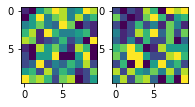

In [22]:
w, h = 10, 10 # размеры графика по осям
fig = plt.figure(figsize=(3, 3)) # размеры по отрисовке
columns, rows = 2, 1 #количество картинок по столбцам и строкам

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

version 1 - через canny detector и hough lines

In [9]:
img=cv.imread('images/hand.jpeg')

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges=cv.Canny(gray,75,150)
lines=cv.HoughLinesP(edges,1,np.pi/180,50)

for line in  lines:
    x1,y1,x2,y2=line[0]

In [14]:
RGB_im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
edges_norm = cv.cvtColor(edges, cv.COLOR_BGR2RGB)

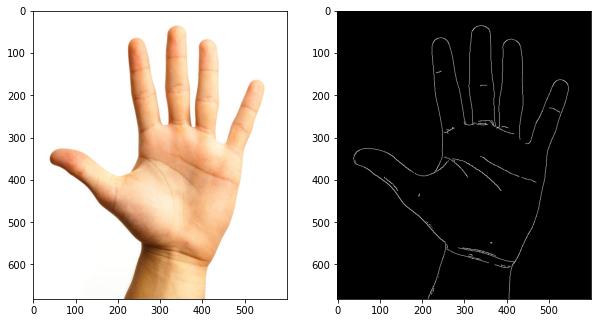

In [25]:
fig = plt.figure(figsize=(10, 10)) # размеры по отрисовке
columns, rows = 2, 1 #количество картинок по столбцам и строкам

fig.add_subplot(rows, columns, 1)
plt.imshow(RGB_im)

fig.add_subplot(rows, columns, 2)
plt.imshow(edges_norm)

plt.show()

version 2 - выделяет места, где должны быть линии, если рука развернута и центрирована, считает количество черных пикселей при идеальном освещении, ставит костыль на то, если оно не посчиталось - и потом предсказывает, не прорисовывая сами линии

Image of **right** hand!

Heart Line - shows a person's attitude to love and quality of love.

Head Line - reveals a person's wisdom, belief, attitude, thinking ability, strain capacity, creative ability as well as abilities of memory, self-control and more. 

LIfe line - age & mainly reflects a person's physical vitality and life energy


In [54]:
img = Image.open("images/hh1.png") 
width, height = img.size

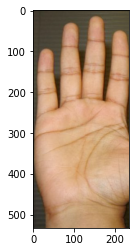

In [60]:
fig = plt.figure(figsize=(4, 4)) # размеры по отрисовке
fig.add_subplot(1, 1, 1)

plt.imshow(img)

plt.show()

In [61]:
area = (0,220,int(width),int(height/1.16))
area1 = (0,240,int(width),int(height/1.65))
area2 = (0,280,int(width),int(height/1.55))
area3 = (int(width/2),280,int(width),int(height/1.3))

In [ ]:
area, area1, area2

In [8]:
img_default = img.crop(area)
img1 = img.crop(area1)
img2 = img.crop(area2)
img3 = img.crop(area3)

img_default.save("images/palm.png")
img1.save("images/heartLine.png")
img2.save("images/headLine.png")
img3.save("images/lifeLine.png") 

In [26]:
img1 = cv.imread("images/heartLine.png")
img2 = cv.imread("images/headLine.png")
img3 = cv.imread("images/lifeLine.png")

In [27]:
img1_norm = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_norm = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3_norm = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

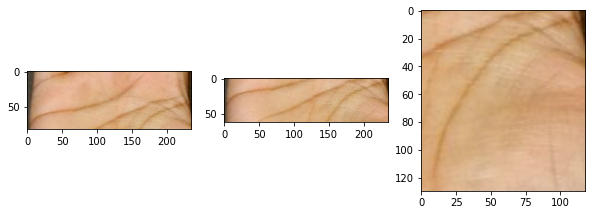

In [28]:
fig = plt.figure(figsize=(10, 10)) # размеры по отрисовке
columns, rows = 3, 1 #количество картинок по столбцам и строкам

fig.add_subplot(rows, columns, 1)
plt.imshow(img1_norm)

fig.add_subplot(rows, columns, 2)
plt.imshow(img2_norm)

fig.add_subplot(rows, columns, 3)
plt.imshow(img3_norm)

plt.show()

In [29]:
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

ret1, threshold1 = cv.threshold(gray1,160,255,cv.THRESH_BINARY)
ret2, threshold2 = cv.threshold(gray2,160,255,cv.THRESH_BINARY)
ret3, threshold3 = cv.threshold(gray3,160,255,cv.THRESH_BINARY)

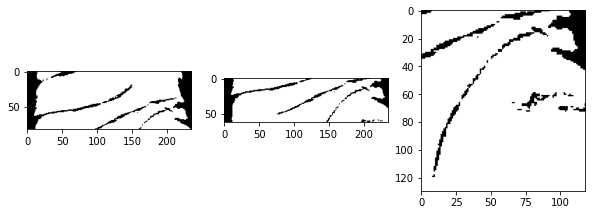

In [34]:
threshold1_norm = cv.cvtColor(threshold1, cv.COLOR_GRAY2RGB)
threshold2_norm = cv.cvtColor(threshold2, cv.COLOR_GRAY2RGB)
threshold3_norm = cv.cvtColor(threshold3, cv.COLOR_GRAY2RGB)

fig = plt.figure(figsize=(10, 10)) # размеры по отрисовке
columns, rows = 3, 1 #количество картинок по столбцам и строкам

fig.add_subplot(rows, columns, 1)
plt.imshow(threshold1_norm)

fig.add_subplot(rows, columns, 2)
plt.imshow(threshold2_norm)

fig.add_subplot(rows, columns, 3)
plt.imshow(threshold3_norm)

plt.show()

In [36]:
nonzero1 = cv.countNonZero(threshold1)
total1 = img1.shape[0] * img1.shape[1]
zero1 = total1 - nonzero1
ratio1 = nonzero1 * 100 / float(total1)

In [37]:
nonzero1, total1, ratio1

(16032, 19505, 82.19430915149961)

In [38]:
nonzero2 = cv.countNonZero(threshold2)
total2 = img2.shape[0] * img2.shape[1]
zero2 = total2 - nonzero2
ratio2 = nonzero2 * 100 / float(total2)

In [39]:
nonzero2, total2, ratio2

(12543, 14805, 84.72137791286727)

In [40]:
nonzero3 = cv.countNonZero(threshold3)
total3 = img3.shape[0] * img3.shape[1]
zero3 = total3 - nonzero3
ratio3 = nonzero3 * 100 / float(total3) 

In [41]:
nonzero3, total3, ratio3

(14049, 15340, 91.58409387222946)

In [44]:
if(ratio1<50):
    
    ratio1+=40

if(ratio2<50):
    
    ratio2+=40

if(ratio3<50):
    
    ratio3+=40 
    
    
### это что, костыль?????

In [45]:
ratio1, ratio2, ratio3

(82.19430915149961, 84.72137791286727, 91.58409387222946)

In [48]:
if(ratio1>80):
    print("Your attitude towards love and quality of love is little complicated & have a deep affection towards your partner.")

else:
    print("Your love and marriage life go smoothly & you could have a good personal relationship.")

Your attitude towards love and quality of love is little complicated & have a deep affection towards your partner.


In [49]:
if(ratio2>80):
    print("It indicates you are smart & you have a very clear mind. You are responsive, good at thinking and more considerate than others.")

else:
    print("you are usually slow to respond, hasty, careless, indecisive and impulsive. However, your advantage is that you could finish the assigned task in a systematic way.")

It indicates you are smart & you have a very clear mind. You are responsive, good at thinking and more considerate than others.


In [51]:
if(ratio3>80):
    print("You are suited to a life of physical fitness/labor and are good at sports. Highly resistant to disease.")

else:
    print("You are good at using mind & you are susceptible to illness.")

You are suited to a life of physical fitness/labor and are good at sports. Highly resistant to disease.
